In [145]:
import pandas as pd
data=pd.read_csv('processed_data/data.csv')
import nltk
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [146]:
data=data[data.sender.isin(data.groupby('sender').size().pipe(lambda x: x[x>100]).index)]

In [147]:
splitted=data.body.str.lower().str.replace('[^a-z ]', '').str.split().dropna()

In [148]:
data

,sender,body
64,andy.zipper@enron.com,I would like Amita to have the ability to add ...
65,andy.zipper@enron.com,I think the broker is never really the counter...
66,andy.zipper@enron.com,"Let me try and be clear on this, as I m not su..."
67,andy.zipper@enron.com,FYI
68,andy.zipper@enron.com,Mark can we put togethr a term sheet for the b...
69,andy.zipper@enron.com,FYI
70,andy.zipper@enron.com,Try this one....
71,andy.zipper@enron.com,"This is what I got back from espeed, which is ..."
72,andy.zipper@enron.com,The going gets pretty slow with all the differ...
73,andy.zipper@enron.com,Please take a look at these prior to us gettin...


In [149]:
def b(x):
    try:
        return len(x)
    except:
        print(x)
        return None
splitted.apply(b)

64        43
65        62
66       226
67         1
68        74
69         1
70         3
71        23
72        10
73        11
74        31
75        11
76        19
77        12
78        13
79        74
80         1
81        10
82        11
83        31
84        19
85        12
86        13
87        11
88         4
89        21
90         8
91        56
92        57
93        18
        ... 
86857     19
86858      5
86859     11
86860     12
86861      5
86862     11
86863     10
86864     15
86865      1
86866      5
86867     16
86868     19
86869     75
86870     11
86871     32
86872      7
86873      5
86874     47
86875     12
86876      9
86877     14
86878     61
86879      1
86880     17
86881     11
86882     75
86883      7
86884      3
86885     46
86886     10
Name: body, Length: 86313, dtype: int64

In [150]:
from itertools import chain
from collections import Counter
def get_word_count(x):
    try:
        counted=Counter(chain(*x))
        counter_words=pd.Series(counted)/len(x)
    except:
        print(x)
        raise
    return counter_words

In [151]:
words=get_word_count(splitted).to_frame().rename(columns={0:'baseline'}).query(f'baseline>5/{len(splitted)}')

In [152]:
words_by_sender=data.assign(splitted=splitted).dropna().groupby('sender').splitted.apply(get_word_count).unstack()

In [153]:
words.sort_values('baseline',ascending=False).query('baseline<0.2 and baseline>0.01')

,baseline
from,0.186808
can,0.183113
t,0.174771
would,0.174574
your,0.174562
or,0.172836
please,0.164564
my,0.161100
know,0.154797
was,0.147765


In [154]:
rel_count=pd.merge(words_by_sender.T.reset_index(), words.reset_index(), on="index").set_index(
    "index"
).apply(lambda x: x / x.baseline, axis=1)

In [155]:
# Words per email-person, eg how many times does X say W per email, on average
# vs Words per email, how many times an emails says W, on average
%matplotlib inline
rel_count

,andy.zipper@enron.com,barry.tycholiz@enron.com,benjamin.rogers@enron.com,bill.rapp@enron.com,cara.semperger@enron.com,carol.clair@enron.com,charles.weldon@enron.com,chris.dorland@enron.com,chris.germany@enron.com,dan.hyvl@enron.com,...,steven.j.kean@enron.com,susan.bailey@enron.com,susan.scott@enron.com,tana.jones@enron.com,teb.lokey@enron.com,theresa.staab@enron.com,thomas.a.martin@enron.com,tori.kuykendall@enron.com,tracy.geaccone@enron.com,baseline
index,,,,,,,,,,,,,,,,,,,,,
a,0.738384,1.127667,0.894840,1.030193,1.204340,1.096872,1.293598,0.910852,0.871904,1.362967,...,0.878676,0.886969,2.387147,0.958497,0.471957,0.385178,0.754977,1.116178,0.214048,1.0
aa,NaN,1.310155,0.716766,NaN,NaN,1.068561,NaN,NaN,NaN,NaN,...,0.354214,NaN,2.654501,NaN,NaN,NaN,NaN,NaN,NaN,1.0
aaa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.597508,NaN,NaN,NaN,NaN,NaN,1.0
aadepartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47.818837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
aaron,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.812277,NaN,...,3.877203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
ab,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.894507,NaN,NaN,...,1.054827,NaN,NaN,0.177874,NaN,NaN,NaN,NaN,NaN,1.0
abandon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.266163,NaN,NaN,NaN,NaN,NaN,NaN,1.0
abandoned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
abandoning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [156]:
#Not removing stopwords, I or please might be useful
rel_count.isnull().mean(axis=1).pipe(lambda x: x[x<0.01])

index
a         0.0
about     0.0
all       0.0
am        0.0
an        0.0
and       0.0
are       0.0
as        0.0
at        0.0
back      0.0
be        0.0
been      0.0
but       0.0
by        0.0
can       0.0
did       0.0
do        0.0
for       0.0
get       0.0
going     0.0
good      0.0
have      0.0
here      0.0
i         0.0
if        0.0
in        0.0
is        0.0
it        0.0
just      0.0
know      0.0
         ... 
or        0.0
out       0.0
please    0.0
see       0.0
so        0.0
thanks    0.0
that      0.0
the       0.0
there     0.0
they      0.0
think     0.0
this      0.0
time      0.0
to        0.0
today     0.0
until     0.0
up        0.0
us        0.0
want      0.0
was       0.0
we        0.0
what      0.0
when      0.0
who       0.0
will      0.0
with      0.0
work      0.0
would     0.0
you       0.0
your      0.0
Length: 72, dtype: float64

In [157]:
ignore_words=rel_count.isnull().mean(axis=1).pipe(lambda x: x[x>0.8]).index
rel_count[~rel_count.index.isin(ignore_words)].loc['cute'].sort_values()

jeff.dasovich@enron.com         0.386574
james.d.steffes@enron.com       0.514530
carol.clair@enron.com           0.593645
eric.bass@enron.com             0.777237
debra.perlingiere@enron.com     0.869872
kimberly.watson@enron.com       0.929836
baseline                        1.000000
gerald.nemec@enron.com          1.015334
kay.mann@enron.com              1.137239
daren.j.farmer@enron.com        1.222010
matthew.lenhart@enron.com       1.253147
shelley.corman@enron.com        1.482048
john.arnold@enron.com           1.519020
sally.beck@enron.com            2.069112
kevin.hyatt@enron.com           2.089397
tana.jones@enron.com            2.090568
marie.heard@enron.com           2.286679
scott.neal@enron.com            2.432860
jane.tholt@enron.com            2.599006
mark.whitt@enron.com            2.976516
lindy.donoho@enron.com          3.482329
chris.germany@enron.com         3.853861
larry.f.campbell@enron.com      4.074924
stacy.dickson@enron.com         4.439969
stanley.horton@e

In [158]:
rel_count.mean(axis=1).sort_values()

index
state                                                  0.695447
said                                                   0.697017
houston                                                0.765389
power                                                  0.769985
davis                                                  0.771201
bill                                                   0.801374
shall                                                  0.811221
edison                                                 0.813543
department                                             0.831692
list                                                   0.834486
re                                                     0.835914
form                                                   0.836324
sent                                                   0.839941
direct                                                 0.847247
which                                                  0.848542
fax                               

In [159]:
data[data.body.str.contains("energy")]

,sender,body
141,andy.zipper@enron.com,Bruce Peterson at Korn Ferry International. He...
270,andy.zipper@enron.com,Greg and PhilippeHaving listened to the DealBe...
814,barry.tycholiz@enron.com,Stephanie and I met with Jeff Dasovich in San ...
815,barry.tycholiz@enron.com,Stephanie and I met with Jeff Dasovich in San ...
1014,benjamin.rogers@enron.com,It was good to see a fellow Yankee down in the...
1015,benjamin.rogers@enron.com,Thanks for the informative infomation session ...
1072,benjamin.rogers@enron.com,Just wanted to let you know that I received an...
1073,benjamin.rogers@enron.com,"Just to give you an update, I reeived an e-mai..."
1097,benjamin.rogers@enron.com,Professor Titman: I would like to thank you fo...
1098,benjamin.rogers@enron.com,Professor Ronn: I would like to thank you for ...


In [258]:
coordial = ["thanks", "thanks", "pls", "hi", "hello"]
# Issue: "not good"
nice = ["cute", "nice", "nicely", "nicest", "funny", "good", "sweet"]
shorts = ["no", "yes", "fyi", "approved", "not"]
social = [
    "drink",
    "drinks",
    "drinking",
    "horse",
    "horses",
    "fun",
    "funeral",
    "wedding",
    "weddings",
    "child",
    "children",
    "grandchild",
    "grandchildren",
    "football",
    "friend",
]
bad = ["hate", "dislike", "bullshit", "bitch"]
tentative = ["perhaps", "maybe", "could", "might"]
time = ["today", "tomorrow"]
work = [
    "busy",
    "work",
    "need",
    "schedule",
    "preschedule",
    "folder",
    "office",
    "business",
    "energy",
    "credit",
]
apology = ["sorry", "sry", "i m late", "lazy"]
emote = ["feel", "feeling", "yikes", "sad", "happy", "crazy", "anxious", "anxiety"]
word_categories = coordial + nice + shorts + social + bad + tentative + time + work

In [257]:
data[data.body.str.contains("lazy")].sample(1)

,sender,body
81431,susan.scott@enron.com,"Ted, I tried to send this page a little while ..."


In [161]:
data.body.head().str.split().apply(lambda x: pd.np.mean(list(map(len,x))))

64    4.325581
65    4.806452
66    4.502203
67    3.000000
68    4.680000
Name: body, dtype: float64

In [198]:
data.body.str.lower().str.count("\\b"+"|".join(social)+"\\b").pipe(lambda x: x[x!=0]).sort_values()

99        1
58433     1
58451     1
58457     1
58475     1
58477     1
58481     1
58502     1
58520     1
58536     1
58538     1
58540     1
58548     1
58555     1
58561     1
58565     1
58585     1
58587     1
58600     1
58634     1
58423     1
58641     1
58419     1
58411     1
58255     1
58258     1
58271     1
58273     1
58279     1
58305     1
         ..
81400     9
81066     9
76597     9
45284    10
56652    10
44264    10
32934    11
29851    11
73171    11
20857    12
31784    12
30610    12
34875    12
8639     12
76445    12
20829    12
56634    13
29790    13
31634    13
45251    13
29789    13
23365    14
20887    19
55217    19
55216    19
55215    22
30563    25
31738    25
21191    40
31035    46
Name: body, Length: 3355, dtype: int64

In [272]:
email_metadata = data.assign(
    email_len=lambda x: x.body.str.len(),
    is_short=lambda x: x.body.str.len() < 10,
    is_request=lambda x: x.body.str.lower().str.contains("can you|could you"),
    excl_count=lambda x: x.body.str.count("!"),
    avg_wordlen=lambda x: x.body.str.split().apply(
        lambda x: pd.np.mean(list(map(len, x)))
    ),
    par_count=lambda x: x.body.str.count("\([A-z0-9 _.]{3,}\)"),
    punct_count=lambda x: x.body.str.count("([.,;:])"),
    comma_count=lambda x: x.body.str.count("([,])"),
    longword_count=lambda x: x.body.str.count("\w{6,}"),
    question_count=lambda x: x.body.str.count("\?"),
    secondperson=lambda x: x.body.str.count("[.?! ]?you "),
    firstperson=lambda x: x.body.str.lower().str.count("[.?! ]?[i|we] "),
    avg_social=lambda x: x.body.str.lower().str.count("\\b"+"|".join(social)+"\\b"),
    avg_positive=lambda x: x.body.str.lower().str.count("\\b"+"|".join(nice)+"\\b"),
    avg_coordial=lambda x: x.body.str.lower().str.count("\\b"+"|".join(coordial)+"\\b"),
    avg_work=lambda x: x.body.str.lower().str.count("\\b"+"|".join(work)+"\\b"),
    avg_tentative=lambda x: x.body.str.lower().str.count("\\b"+"|".join(tentative)+"\\b"),
    avg_negative=lambda x: x.body.str.lower().str.count("\\b"+"|".join(bad)+"\\b"),
    avg_emote=lambda x: x.body.str.lower().str.count("\\b"+"|".join(emote)+"\\b"),
    avg_apology=lambda x: x.body.str.lower().str.count("\\b"+"|".join(apology)+"\\b"),
)

email_metadata = (
    email_metadata.drop(columns="body")
    .groupby("sender")
    .mean()
    .reset_index()
    .rename(columns={"sender": "index"})
    .set_index("index")
)

In [271]:
data.sample(5).body.apply(print)

Dale,Please, call me on Tuesday. My morning schedule is full but I am open in the afternoon.Vince
For volumes in excess of the 60,000 on our term agreement which were redelivered to HPL at Mobil Beaumont, we agree to pay Inside Ferc HSC-.045 for the month of March. The price at which HPL delivered the gas at Eastrans remains at Inside Ferc HSC-.04.Daren Farmer"Bruce McMills" <bmcmills@duke-energy.com> on 03/06/2000 10:49:59 AMTo: Stacey.Neuweiler@enron.com,
Rakesh,Looks fine.VinceRakesh
I am under the impression that we still need to file the attached protest to a 12/13/00 Cal PX FERC filing that would (in the PX s interpretation) allow them to confiscate our collateral in the Block Forward Market to satisfy the defaults of other participants in the PX markets. Please let me know if we don t need to file this. Please give me your comments on the draft ASAP.
Please see the attached PowerPoint presentation. This is a first draft of certain sections (Industry Environment, Competitive Envi

24342    None
9261     None
24296    None
56682    None
49751    None
Name: body, dtype: object

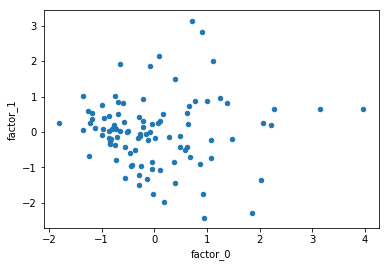

In [296]:
# X=rel_count[rel_count.index.isin(word_categories)].fillna(0).T
# X=X.join(email_metadata).drop('baseline')
X=email_metadata
X_norm=X.apply(lambda x: (x-x.mean())/x.std(),axis=0)
from sklearn.decomposition import PCA,FactorAnalysis
from sklearn.manifold import TSNE
pca=FactorAnalysis(3)
model=pd.DataFrame(pca.fit_transform(X_norm)).set_index(X_norm.index)
model.columns=[f"factor_{i}" for i in model.columns]
model.plot.scatter(0,1)

In [292]:
pd.concat([X_norm,model],axis=1).sort_values('factor_0')

,email_len,is_short,is_request,excl_count,avg_wordlen,par_count,punct_count,comma_count,longword_count,question_count,...,avg_work,avg_tentative,avg_negative,avg_emote,avg_apology,factor_0,factor_1,factor_2,factor_3,factor_4
index,,,,,,,,,,,,,,,,,,,,,
mike.maggi@enron.com,-1.790227,3.564710,-1.348299,-0.613625,-1.246605,-0.999543,-1.941832,-1.377714,-1.633229,-1.514120,...,-1.377564,-1.049882,-0.529150,0.295430,1.284627,-1.810653,0.114238,-0.567005,0.207282,2.339449
james.derrick@enron.com,-1.330258,4.549154,-1.298188,-0.521598,-0.063925,-0.667879,-1.252254,-0.933912,-1.181430,-1.395452,...,-1.218152,-1.096658,-0.529150,-0.986308,-1.326069,-1.355802,0.961111,-0.581051,0.050130,1.189667
tracy.geaccone@enron.com,-1.344914,1.761277,0.275196,-0.438243,-1.016342,-0.757473,-1.355284,-1.314003,-1.267488,0.046987,...,-0.395945,-0.953791,-0.132267,-0.718239,-0.902344,-1.351364,0.014656,-0.546763,-0.071395,0.203277
joe.parks@enron.com,-1.254274,0.804981,-0.879594,-0.571783,0.315716,-0.526519,-1.264790,-0.835111,-1.131487,-0.815839,...,-0.962685,-0.816920,-0.529150,-0.806914,-0.286263,-1.270576,0.530316,-0.399880,0.095141,0.345588
matthew.lenhart@enron.com,-1.230190,-0.342822,-1.076587,-0.517329,-1.264876,-0.941142,-1.315371,-1.519816,-1.338758,0.132261,...,-0.965161,-0.164691,1.194358,-0.507152,-0.480058,-1.241991,-0.716160,-0.045657,0.019245,1.204833
rod.hayslett@enron.com,-1.219918,3.467688,0.368449,-0.569837,-0.923612,-0.717497,-1.466963,-1.230551,-1.149406,-0.417829,...,-0.549975,-0.757362,-0.529150,-0.614615,-1.185012,-1.233953,0.139479,-1.050494,-0.105514,0.728433
hunter.s.shively@enron.com,-1.177699,0.570967,-0.179872,-0.613625,0.179886,-0.670466,-1.404126,-1.319395,-0.972241,-0.444689,...,-0.719219,-1.150607,-0.529150,-0.826971,-1.134061,-1.190482,0.415309,-0.829961,0.272292,0.450527
mike.carson@enron.com,-1.172205,-0.563640,-1.348299,2.526811,1.510677,-0.776184,-0.282526,-0.132503,-1.184206,2.704779,...,-1.185741,-1.417621,-0.529150,-1.060936,-0.446378,-1.170243,0.410203,1.697636,2.080286,-0.756329
lavorato@enron.com,-1.130800,1.238610,0.673069,-0.458951,-0.966181,-0.728447,-1.214436,-1.363408,-1.077958,-1.087815,...,-0.841272,-0.551622,-0.529150,-0.714383,-0.756630,-1.139858,0.029769,-0.699397,-0.245210,0.351236


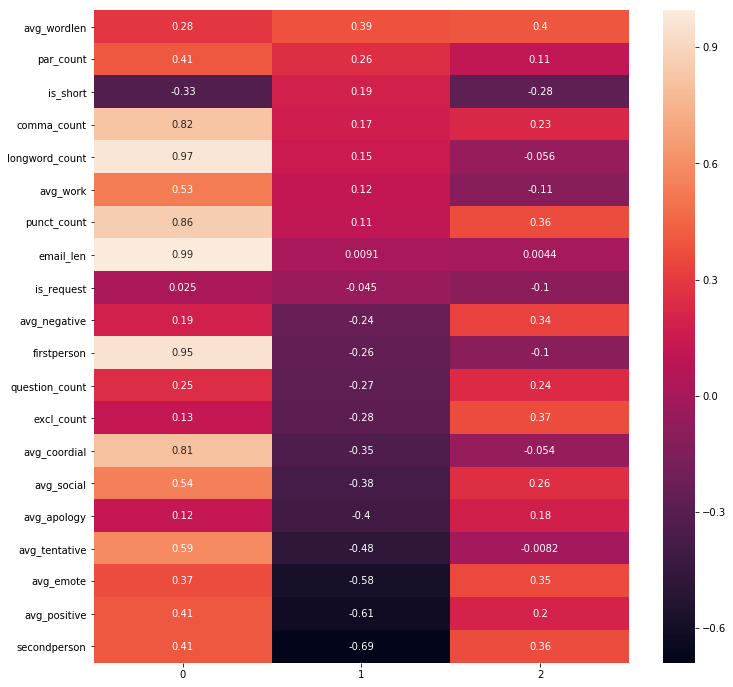

In [297]:
# Loadings
loadings = pd.DataFrame(pca.components_).T
import seaborn as sns

plt.figure(figsize=(12,12))
loadings.set_index(X_norm.columns).sort_values(1, ascending=False).pipe(
    sns.heatmap, annot=True, square=False, ax=plt.gca()
)

In [293]:
pd.DataFrame(pca.fit_transform(X_norm)).sort_values(0)

,0,1,2,3,4
66,-1.810653,0.114238,-0.567005,0.207282,2.339449
29,-1.355802,0.961111,-0.581051,0.050130,1.189667
98,-1.351364,0.014656,-0.546763,-0.071395,0.203277
35,-1.270576,0.530316,-0.399880,0.095141,0.345588
61,-1.241991,-0.716160,-0.045657,0.019245,1.204833
79,-1.233953,0.139479,-1.050494,-0.105514,0.728433
26,-1.190482,0.415309,-0.829961,0.272292,0.450527
64,-1.170243,0.410203,1.697636,2.080286,-0.756329
48,-1.139858,0.029769,-0.699397,-0.245210,0.351236
83,-1.002287,0.739316,-0.228350,0.048415,0.280475


In [175]:
#Compare with IBM data
ibm=pd.read_csv('processed_data/personalities.csv').groupby(['name','sender']).sum().unstack().percentile.T
X_norm.sort_values('cute')

,approved,business,busy,child,children,could,credit,cute,drink,drinking,...,thanks,today,tomorrow,wedding,weddings,work,yes,email_len,is_short,is_request
andy.zipper@enron.com,-0.459075,0.017697,-0.512331,-0.199271,0.621933,-0.609117,-0.426085,-0.388002,-0.439191,-0.447014,...,-0.259235,-0.231091,-0.855986,-0.394646,-0.173923,-0.279599,-0.207237,-0.875882,0.372656,-0.075213
mike.grigsby@enron.com,-0.352420,0.032358,0.110784,0.019158,-0.303445,-0.990142,-0.384144,-0.388002,-0.439191,-0.447014,...,-0.507605,-0.920137,-0.031731,-0.394646,-0.173923,0.433142,-0.791407,-0.467233,-0.668947,-0.590166
mike.carson@enron.com,-0.459075,-0.575287,-0.981109,-0.199271,0.554039,-1.322443,-0.599210,-0.388002,-0.439191,1.191927,...,-0.758387,-1.149762,-0.873640,2.581181,-0.173923,-0.805314,-0.625276,-1.285174,-0.545732,-1.392850
michelle.lokay@enron.com,0.000171,-0.690256,-0.712448,-0.199271,-0.303445,-0.777358,-0.400771,-0.388002,-0.439191,-0.447014,...,0.082523,-1.300406,-0.751852,-0.394646,-0.173923,-1.162504,3.399932,0.510334,-0.310776,-0.753877
michelle.cash@enron.com,-0.193072,-0.215409,-0.572626,0.345498,-0.169052,0.179704,-0.599210,-0.388002,-0.313477,0.066726,...,1.506354,-0.192713,-0.083194,-0.161447,-0.173923,2.118831,-0.294957,0.009453,-0.418544,0.049713
matt.smith@enron.com,-0.374029,-0.091416,0.063683,-0.199271,-0.303445,0.134903,-0.470592,-0.388002,0.203895,1.524000,...,-0.209284,1.201065,-0.024039,-0.394646,-0.173923,0.635355,0.053267,0.186456,0.108173,0.715546
mary.hain@enron.com,0.474797,-0.346028,-0.981109,-0.199271,-0.303445,2.072114,-0.599210,-0.388002,-0.439191,-0.447014,...,-0.549127,2.119823,3.614477,-0.394646,-0.173923,0.117532,-1.003482,2.785286,0.717738,-0.896736
martin.cuilla@enron.com,-0.228093,-0.712589,2.802399,-0.199271,1.563739,-0.242957,0.215879,-0.388002,-0.439191,1.337395,...,-0.208891,-0.119957,-0.611094,2.035319,8.653146,0.210723,-0.933093,1.134891,-0.501258,-1.188338
mark.mcconnell@enron.com,0.389531,-0.424611,-0.981109,-0.199271,-0.303445,-0.000463,-0.064466,-0.388002,-0.439191,-0.447014,...,-0.467925,0.293032,-0.204743,-0.394646,-0.173923,-0.301396,-0.963075,0.911543,-0.545732,-0.453648
mark.e.taylor@enron.com,0.780504,1.115812,-0.001507,-0.110196,-0.303445,1.071604,1.845539,-0.388002,0.054140,-0.111008,...,-0.228874,0.028486,0.434715,-0.242125,-0.173923,0.540598,0.638226,1.530247,0.160236,0.436370


In [208]:
X.join(ibm.rename(columns={'sender':'index'})).corr().avg_wordlen.sort_values()

Agreeableness       -0.325992
Conscientiousness   -0.231419
is_short            -0.213249
is_request          -0.158113
Emotional range     -0.048621
Openness            -0.037274
secondperson        -0.030140
avg_positive        -0.028005
avg_work             0.040583
Extraversion         0.052660
avg_social           0.088179
excl_count           0.097293
avg_coordial         0.104262
question_count       0.122636
firstperson          0.131083
par_count            0.200243
email_len            0.291798
longword_count       0.305078
comma_count          0.367470
punct_count          0.450715
avg_wordlen          1.000000
Name: avg_wordlen, dtype: float64

In [209]:
X_norm.corr().punct_count.sort_values()

is_short         -0.389160
is_request       -0.005887
excl_count        0.149718
question_count    0.207611
avg_positive      0.383416
secondperson      0.420691
avg_wordlen       0.450715
avg_work          0.458424
par_count         0.462760
avg_social        0.500772
avg_coordial      0.662879
firstperson       0.758952
longword_count    0.837111
comma_count       0.856252
email_len         0.867798
punct_count       1.000000
Name: punct_count, dtype: float64

In [ ]:
data[data.body.str.lower().str.contains("\(.+\)")].sample(1).body.values